In [2]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import visuals as vs
%matplotlib inline

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [4]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

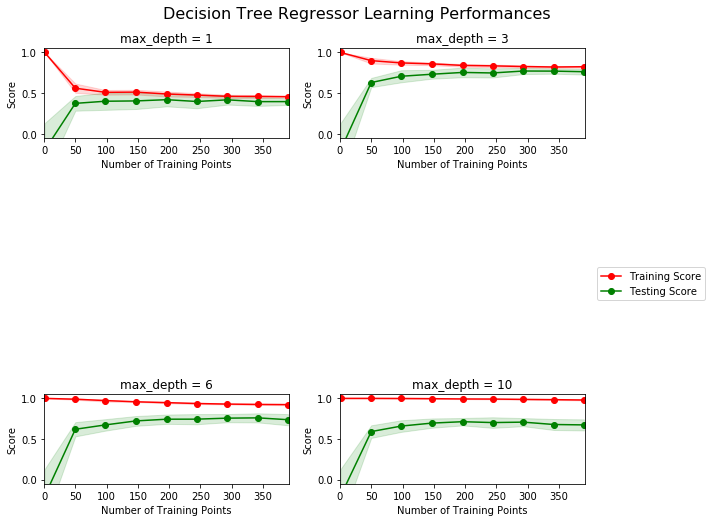

In [5]:
vs.ModelLearning(features, prices)

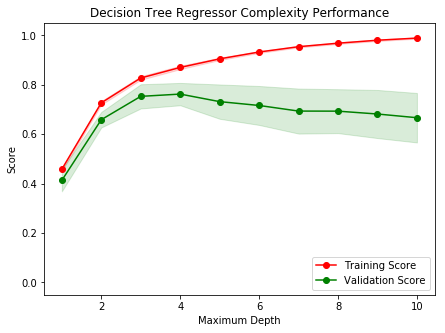

In [6]:
vs.ModelComplexity(X_train, y_train)

In [19]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
regressor = DecisionTreeRegressor()
params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
scoring_fnc = make_scorer(r2_score) 

grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets).fit(X_train, y_train)

reg = grid.best_estimator_
reg.get_params()

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [23]:
reg.predict([[5, 17, 15]])

array([403025.])